## Random Forest - Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


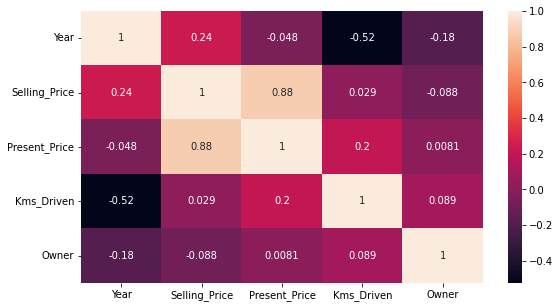

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [ ]:
df["vehicle_age"]=2021-df.Year

In [ ]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [ ]:
df.drop(columns=["Year"], inplace=True)

In [ ]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.350,5.590,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.750,9.540,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.250,9.850,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.850,4.150,5200,Petrol,Dealer,Manual,0,10
4,swift,4.600,6.870,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

__Encoder__

Modelimiz tree based bir model oldugu icin dummy yerine encoder islemini uygulayacagiz :

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
X[cat].head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [ ]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.000,5.590,27000,2.000,0.000,1.000,0,7
1,93.000,9.540,43000,1.000,0.000,1.000,0,8
2,68.000,9.850,6900,2.000,0.000,1.000,0,4
3,96.000,4.150,5200,2.000,0.000,1.000,0,10
4,92.000,6.870,42450,1.000,0.000,1.000,0,7


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling for Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
DT_model = DecisionTreeRegressor(random_state=101)

In [ ]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.952
mae,0.000,0.603
mse,0.000,1.283
rmse,0.000,1.133


* Yukaridaki scorelar DT'de encoding yapilarak alinmis scorelar
* Asagidaki scorelar DT'de get dummies yapilarak alinmis scorelar
> Yukaridaki scorelar icin konusuyoruz overfitting var, biz R2'nin 1 olmasini diger errorlarinsa 0'a yakin olmasini hedefleriz. Classification datalarinda ise scorelarin yukaridaki gibi cikmasi normal karsilanabilir bir durumdur. Ancak classification olmayan bir modelde bu gibi scorelar kabul edilemez. Bu da datada mucadele etmemiz gereken pek cok unsur old nu gosteriyor. Bu pureluk durumunun yani error scorelarinin 0 olmasi durumunun tree based modeller disinda diger modellerde neredeyse imkansizdir. 
> Tree based model olsa bile regresyon analizlerinde error metriclerinin pure olma durumu cok zordur, eger regresyon datalarinda yukarida old gibi pureluk durumu varsa mutlaka ama mutlaka overfitting vardir.

__Cross Validate__

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.891
test_neg_mean_absolute_error       -0.787
test_neg_mean_squared_error        -2.748
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Feature Importances

In [ ]:
DT_model.feature_importances_

array([9.18365194e-03, 8.94444598e-01, 4.78756069e-03, 7.75109283e-04,
       2.82862694e-04, 7.56380773e-04, 3.41291861e-05, 8.97357073e-02])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.000
Transmission,0.001
Fuel_Type,0.001
Kms_Driven,0.005
Car_Name,0.009
vehicle_age,0.090
Present_Price,0.894


# tree base modellerde  label encoder önemli

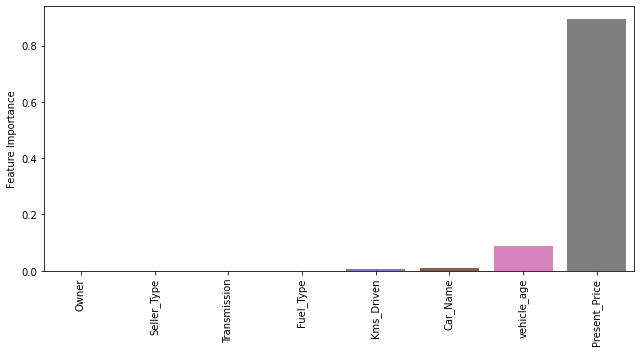

In [ ]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Modeling for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=101)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=101)

In [ ]:
train_val(rf_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986,0.973
mae,0.235,0.513
mse,0.348,0.725
rmse,0.590,0.851


__Cross Validate__

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.862
test_neg_mean_absolute_error       -0.736
test_neg_mean_squared_error        -3.393
test_neg_root_mean_squared_error   -1.566
dtype: float64

CV sonrasi fark var ve uyumlu degil scorelar. Bagging modellerde Random Forest seciyoruz Feature Importance icin, Boosting modellerde ise XGBoost seciyoruz. 

## Feature Importances

In [ ]:
rf_model.feature_importances_

array([2.34156850e-02, 8.66318271e-01, 1.73148579e-02, 2.14160300e-03,
       2.08393371e-03, 2.67174857e-03, 6.16411815e-05, 8.59922594e-02])

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = rf_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
Owner,0.000
Seller_Type,0.002
Fuel_Type,0.002
Transmission,0.003
Kms_Driven,0.017
Car_Name,0.023
vehicle_age,0.086
Present_Price,0.866


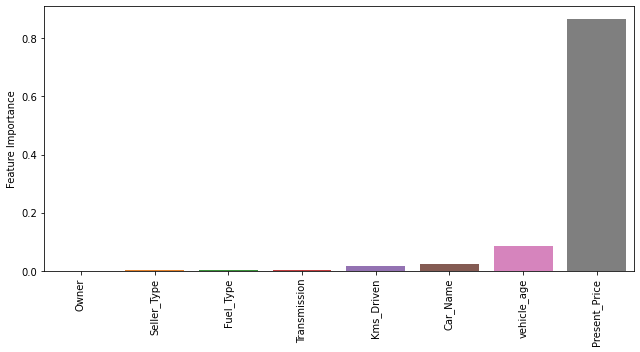

In [ ]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Visualizing trees

In [ ]:
from sklearn.tree import plot_tree

def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[0],filled=True, feature_names=X.columns, fontsize=10);

In [ ]:
pruned_tree = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)
pruned_tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=101)

Eger biz RF Regressor modelini kuruyorsak, icinde mutlaka ama mutlaka max_estimators parametresi olmali, bu parametreyle oynamaliyiz. Cunku default degeri ile tum featurelari almis oluyoruz, biz burada o default degeri degistirerek randomizasyonu saglamaliyiz. 



      train  test
R2    0.963 0.941
mae   0.572 0.750
mse   0.953 1.577
rmse  0.976 1.256




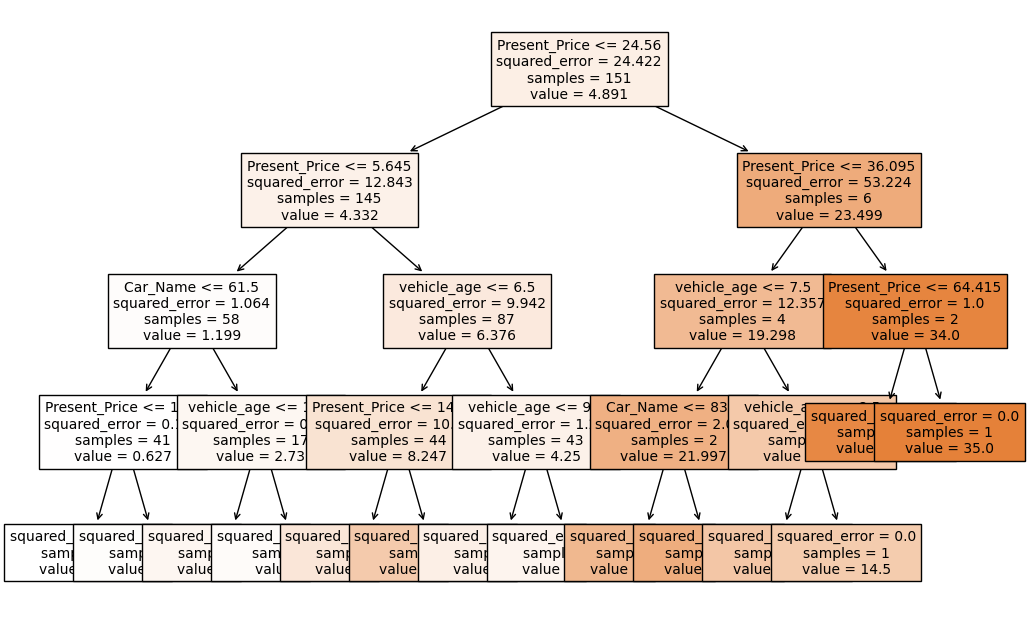

In [ ]:
report_model(pruned_tree)

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestRegressor(random_state=101)

In [ ]:
param_grid = {"n_estimators":[64, 128, 200, 500],     
              "max_depth": [None, 4, 5, 6, 7,8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', len(df.columns)/3, 2, 4]}

In [ ]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 3.0, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [64, 128, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=128, random_state=101)

In [ ]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 128}

In [ ]:
grid_score =pd.DataFrame(grid_model.cv_results_)
grid_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.225,0.029,0.018,0.011,None,auto,1,2,64,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.599,-0.672,-1.995,-0.694,-1.774,-0.736,-2.778,-2.142,-0.833,-3.407,-1.563,0.956,114
1,0.419,0.182,0.025,0.011,None,auto,1,2,128,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.602,-0.715,-2.131,-0.700,-1.716,-0.785,-2.770,-2.081,-0.702,-3.337,-1.554,0.946,103
2,0.321,0.009,0.018,0.001,None,auto,1,2,200,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.606,-0.718,-2.085,-0.712,-1.731,-0.791,-2.741,-1.977,-0.635,-3.309,-1.530,0.933,64
3,0.788,0.009,0.048,0.023,None,auto,1,2,500,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.603,-0.728,-1.920,-0.721,-1.690,-0.831,-2.715,-1.779,-0.684,-3.148,-1.482,0.872,15
4,0.101,0.004,0.008,0.002,None,auto,1,3,64,"{'max_depth': None, 'max_features': 'auto', 'm...",-0.633,-0.629,-2.047,-0.721,-1.284,-0.766,-2.698,-2.140,-0.838,-3.374,-1.513,0.938,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.652,0.007,0.042,0.005,8,4,4,5,500,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.825,-0.878,-1.211,-1.451,-0.912,-1.103,-3.250,-2.172,-0.826,-4.027,-1.665,1.073,539
1532,0.087,0.003,0.008,0.001,8,4,4,6,64,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.742,-0.928,-1.164,-1.523,-1.017,-1.107,-3.207,-2.209,-0.874,-4.392,-1.716,1.145,645
1533,0.172,0.008,0.012,0.001,8,4,4,6,128,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.776,-0.926,-1.200,-1.462,-1.014,-1.184,-3.294,-2.039,-0.870,-4.279,-1.704,1.118,634
1534,0.262,0.004,0.018,0.002,8,4,4,6,200,"{'max_depth': 8, 'max_features': 4, 'min_sampl...",-0.787,-0.919,-1.247,-1.448,-0.920,-1.184,-3.273,-2.067,-0.798,-4.125,-1.677,1.090,577


In [ ]:
grid_model.best_index_

193

In [ ]:
grid_model.best_score_

-1.4440454270480765

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.982,0.960
mae,0.257,0.530
mse,0.459,1.078
rmse,0.678,1.038


__Cross Validate__

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

model = RandomForestRegressor(random_state=101, max_depth = None,
             max_features= 4,
             min_samples_leaf = 1,
             min_samples_split= 2,
             n_estimators= 200)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.894
test_neg_mean_absolute_error       -0.719
test_neg_mean_squared_error        -3.129
test_neg_root_mean_squared_error   -1.454
dtype: float64

In [ ]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [ ]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
220,3.500,3.464,0.036
216,2.900,3.339,-0.439
90,3.800,4.980,-1.180
50,14.900,15.751,-0.851
266,3.650,4.042,-0.392
99,9.650,10.124,-0.474
265,6.500,7.311,-0.811
56,4.500,4.610,-0.110
60,6.950,7.827,-0.877
62,18.750,19.805,-1.055


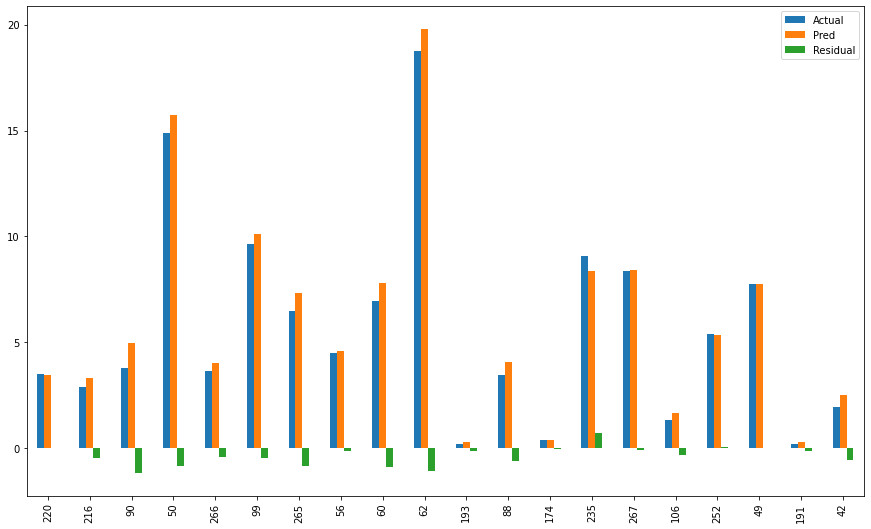

In [ ]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()